# Introduction to Computer Vision: MNIST Challenge
Hi!

3 Upvotes for silver, any upvote will be helpeful!
__________________________

This is my first project on Kaggle and is done mainly for myself, I am sharing it as it might be useful for others. If you have any suggestions or remarks i would be glad to hear. 
Some sections were taken from cs231n homework, and various tutorials/kernels on-line.
<br> Based on this kernel I built an heavier model to maximize my score, I managed to score 99.971, top 9% - https://www.kaggle.com/shaygu/mnist-using-keras-improving-accuracy-13-99-96
To achieve said score I made a net with more parameters and optimized other parameters around it. I've also tried to implement model ensambling but it didnt improve the result. I suspect the reason is that that there isnt enough variance between my models. 
<brr> I've checked my model on the more challenging fashion mnist (further explained at https://github.com/zalandoresearch/fashion-mnist ), you can check my kernel: https://www.kaggle.com/shaygu/fashion-mnist-keras-cnn-94-99-71-on-mnist


### Table of interest:
> ### 1. Starting with Kaggle - importing data 
> ### 2. Visualize some examples from the dataset.
> ### 3. Defining the architecture
> ### 4. Train the model using data augmentation
> ### 5. After train visualizations
> > #### 5.1 Loss graph visualizations
> > #### 5.2 Prediction images visualization
> > #### 5.3 Confusion matrix
> > #### 5.4 Miss-labeled data visualization
> ### 6. Submission

#### Author: Shay Guterman, Hebrew University of Jerusalem: shaygu62@gmail.com


## 1. Starting with Kaggle - importing data 

Important: Switch settings to GPU

### Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf


# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

['sample_submission.csv', 'test.csv', 'train.csv']


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

### Importing the data the data

In [2]:
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

# Import Data
train = pd.read_csv("../input/train.csv")
test= pd.read_csv("../input/test.csv")
print("Train size:{}\nTest size:{}".format(train.shape, test.shape))

# Transform Train and Test into images\labels.
x_train = train.drop(['label'], axis=1).values.astype('float32') # all pixel values
y_train = train['label'].values.astype('int32') # only labels i.e targets digits
x_test = test.values.astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28) / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28) / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.05, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(x_test.shape)

Train size:(42000, 785)
Test size:(28000, 784)
(39900, 28, 28)
(2100, 28, 28)
(39900,)
(28000, 28, 28)


## 2. Visualize some examples from the dataset.
Showing some example per class

(39900, 28, 28)


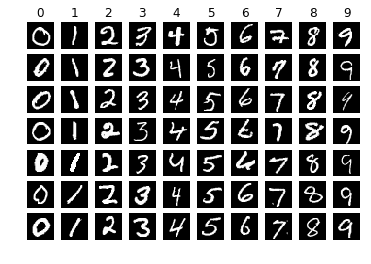

In [3]:
# classes for title
# num classes for amount of examples
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(x_train.shape)
num_classes = len(classes)
samples_per_class = 7
plt.figure(0)
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        # plt.imshow(x_train[idx].astype('uint8'))
        plt.imshow(x_train[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

### Adding dimensions for keras

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)  
x_val = x_val.reshape(x_val.shape[0], 28, 28,1)  
x_test = x_test.reshape(x_test.shape[0], 28, 28,1) 
print("Train size:{}\nvalidation size:{}\nTest size:{}".format(x_train.shape,x_val.shape, x_test.shape))

mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)


Train size:(39900, 28, 28, 1)
validation size:(2100, 28, 28, 1)
Test size:(28000, 28, 28, 1)


## 3. Defining the architecture

### Option 1:
Light architecture with approximately 50K parameters. 
<br>Dropout for avoiding overfitting
<br>BatchNormalization for faster convergence time

In [5]:
from tensorflow.python.keras.layers import Input , Dense , Conv2D , Activation , Add,ReLU,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.python.keras.models import Model


input = Input(shape=[28, 28, 1])
x = Conv2D(32, (5, 5), strides=1, padding='same', name='conv1')(input)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch1')(x)
x = Activation('relu', name='relu1')(x)
# x = Dropout (0.5)(x)
x = Conv2D(32, (5, 5), strides=1, padding='same', name='conv2')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch2')(x)
x = Activation('relu', name='relu2')(x)
# x = Dropout (0.5)(x)
x = Conv2D(32, (5, 5), strides=1, padding='same', name='conv2add')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch2add')(x)
x = Activation('relu', name='relu2add')(x)
x = Dropout (0.15)(x)
x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
x = Conv2D(64, (3, 3), strides=1, padding='same', name='conv3')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch3')(x)
x = Activation('relu', name='relu3')(x)
x = Conv2D(64, (3, 3), strides=1, padding='same', name='conv4')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch4')(x)
x = Activation('relu', name='relu4')(x)
x = Conv2D(32, (3, 3), strides=1, padding='same', name='conv5')(x)
x = BatchNormalization(momentum=0.1, epsilon=1e-5, gamma_initializer='uniform',name='batch5')(x)
x = Activation('relu', name='relu5')(x)
x = Dropout (0.15)(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Flatten()(x)
x = Dense(100, name='Dense30')(x)
x = Activation('relu', name='relu6')(x)
x = Dropout (0.05)(x)
x = Dense(10, name='Dense10')(x)
x = Activation('softmax')(x)
model = Model(inputs = input, outputs =x)

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 32)        832       
_________________________________________________________________
batch1 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
relu1 (Activation)           (None, 28, 28, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 28, 28, 32)        25632     
_________________________________________________________________
batch2 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
relu2 (Activation)           (None, 28, 28, 32)        0     

## 4. Train the model using data augmentation

In [6]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
from tensorflow.python.keras.optimizers import Adam ,RMSprop

checkpoint = ModelCheckpoint("best_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# # CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range= 8,  
        zoom_range = 0.13,  
        width_shift_range=0.13, 
        height_shift_range=0.13)

epochs = 60
lr_initial = 0.0011
# optimizer = RMSprop(lr=0.001, rho=0.95, epsilon=1e-08, decay=0.0)
optimizer = Adam(lr=lr_initial, decay= lr_initial / (epochs*1.3))

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
datagen.fit(x_train)
batch_size = 64

history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[checkpoint])
model.load_weights("best_weights.hdf5") 


Epoch 1/60
622/623 [============================>.] - ETA: 0s - loss: 0.2800 - acc: 0.9117
Epoch 00001: val_acc improved from -inf to 0.98000, saving model to best_weights.hdf5
623/623 [==============================] - 19s 31ms/step - loss: 0.2797 - acc: 0.9118 - val_loss: 0.0700 - val_acc: 0.9800
Epoch 2/60
620/623 [============================>.] - ETA: 0s - loss: 0.0819 - acc: 0.9741
Epoch 00002: val_acc improved from 0.98000 to 0.99143, saving model to best_weights.hdf5
623/623 [==============================] - 13s 21ms/step - loss: 0.0817 - acc: 0.9742 - val_loss: 0.0345 - val_acc: 0.9914
Epoch 3/60
620/623 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.9823
Epoch 00003: val_acc did not improve from 0.99143
623/623 [==============================] - 13s 21ms/step - loss: 0.0596 - acc: 0.9823 - val_loss: 0.0352 - val_acc: 0.9890
Epoch 4/60
621/623 [============================>.] - ETA: 0s - loss: 0.0527 - acc: 0.9836
Epoch 00004: val_acc did not improve from 

### 5. After train visualizations

### 5.1 Loss graph visualizations

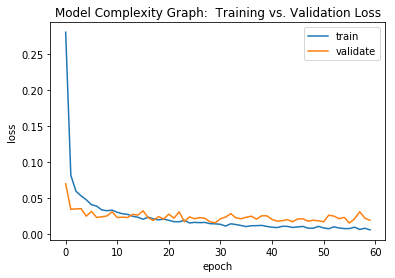

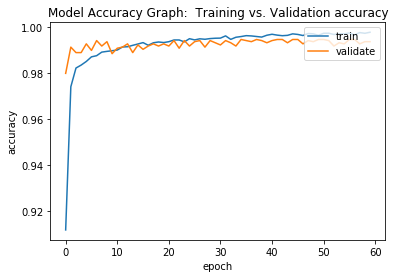

In [7]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Complexity Graph:  Training vs. Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')

plt.figure(2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy Graph:  Training vs. Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()



### 5.2 Prediction images visualization
Stright forward taking some images and plotting predictions

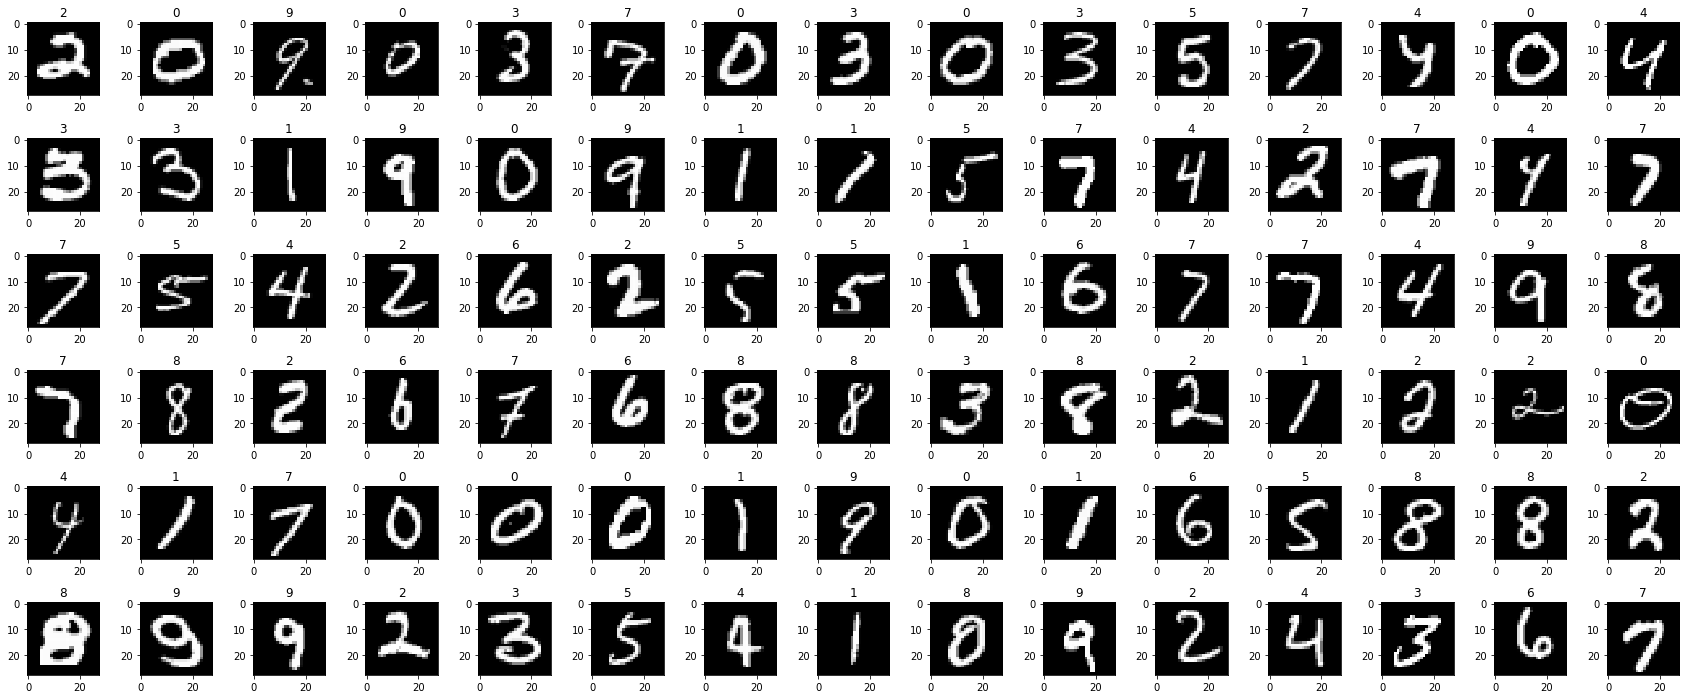

In [8]:
# predicted class
num_rows = 6
num_cols = 15
sample_size = num_rows * num_cols
indices = np.arange(sample_size)
x_pred = x_test[indices,:,:]
predictions = model.predict(x_pred)
x_pred = np.squeeze(x_test[indices,:,:])
y_pred = np.argmax(predictions,axis=1)

num_images = num_rows*num_cols
plt.figure(figsize=(num_cols*2, num_rows*2))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.6)
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plt.imshow(x_pred[i])
  plt.title(classes[y_pred[i]])
  # plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # plot_value_array(i, predictions, test_labels)
plt.show()

### 5.3 Confusion matrix


<Figure size 432x288 with 0 Axes>

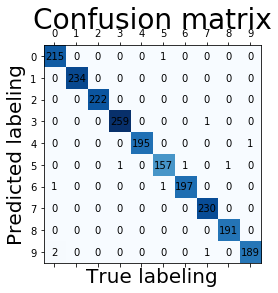

In [9]:
from sklearn.metrics import confusion_matrix

y_vecs = model.predict(x_val)
y_pred = np.argmax(y_vecs, axis=1)
y_true = y_val
cm = confusion_matrix(y_true, y_pred)
# print(cm)

# plt.imshow(cm, cmap = 'ocean')
# plt.colorbar

min_val, max_val = 0, 15

# intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))
plt.figure(11)
fig, ax = plt.subplots()
ax.matshow(cm, cmap=plt.cm.Blues)
# ax.matshow(cm, cmap=plt.cm.magma_r)

for i in range(10):
    for j in range(10):
        c = cm[j,i]
        ax.text(i, j, str(c), va='center', ha='center')


plt.xticks(range(10))
plt.yticks(range(10))
plt.title('Confusion matrix',size = 28)
plt.xlabel('True labeling',size = 20)
plt.ylabel('Predicted labeling',size = 20)
plt.rcParams.update({'font.size': 22})



### 5.4 Miss-labeled data visualization

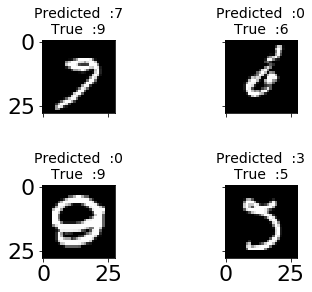

<Figure size 1080x432 with 0 Axes>

In [10]:
# Display some error results 
# y_vecs = model.predict(x_test)
# y_pred = np.argmax(y_vecs, axis=1)
Y_true = y_val
Y_pred_classes =  y_pred
Y_pred = y_vecs
X_val = x_val
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 2
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
    plt.figure(figsize=(num_cols, num_rows))

    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted  :{}\nTrue  :{}".format(pred_errors[error],obs_errors[error]), fontsize=14)
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-25:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

## 6. Submission

In [11]:
# predict results
results = model.predict(x_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("MNIST-CNN-ENSEMBLE.csv",index=False)

## Save model

In [12]:
# model.save('gdrive/My Drive/DL-ML/mnist/2203 995 percent.h5')